In [46]:
import os
import pydicom
import matplotlib.pyplot as plt
import glob
import numpy as np
import pandas as pd

In [93]:
img_dir = '/home/local/PARTNERS/dw640/mnt/women_health_internal/dufan.wu/dect/DECT/Images/'
img_name = '60'

In [94]:
fd_folder = np.sort(glob.glob(os.path.join(img_dir, 'DECT_%s*'%img_name, '*FD*')))[0]
hd_folder = np.sort(glob.glob(os.path.join(img_dir, 'DECT_%s*'%img_name, '*HD*')))[0]

In [95]:
def get_aec(dicom_folder):
    records = []
    filenames = glob.glob(os.path.join(dicom_folder, '*.IMA'))

    print (len(filenames))
    for i, filename in enumerate(filenames):
        if (i+1) % 50 == 0:
            print (i+1, end=',')
        dcm = pydicom.dcmread(filename)
        records.append({'KVP': dcm.KVP, 
                        'Current': dcm.XRayTubeCurrent, 
                        'z': dcm.ImagePositionPatient[-1]})
    
    records = pd.DataFrame(records).sort_values(['KVP', 'z'])
    return records


In [96]:
fd_aec = get_aec(fd_folder)
hd_aec = get_aec(hd_folder)

350
50,100,150,200,250,300,350,350
50,100,150,200,250,300,350,

-366.7


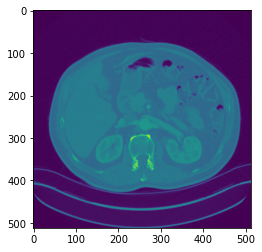

In [97]:
filenames = glob.glob(os.path.join(fd_folder, '*.IMA'))
dcm = pydicom.dcmread(filenames[fd_aec.index[0]])
print (dcm.ImagePositionPatient[-1])
plt.imshow(dcm.pixel_array)

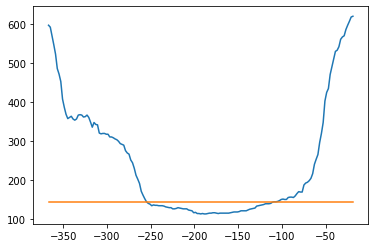

In [98]:
kvp = 80
plt.plot(fd_aec.loc[fd_aec['KVP'] == kvp, 'z'].values, fd_aec.loc[fd_aec['KVP'] == kvp, 'Current'].values)
plt.plot(hd_aec.loc[hd_aec['KVP'] == kvp, 'z'].values, hd_aec.loc[hd_aec['KVP'] == kvp, 'Current'].values)

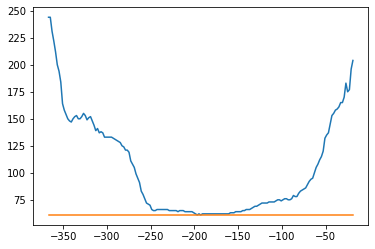

In [99]:
kvp = 140
plt.plot(fd_aec.loc[fd_aec['KVP'] == kvp, 'z'].values, fd_aec.loc[fd_aec['KVP'] == kvp, 'Current'].values)
plt.plot(hd_aec.loc[hd_aec['KVP'] == kvp, 'z'].values, hd_aec.loc[hd_aec['KVP'] == kvp, 'Current'].values)